In [1]:
import sys
import os
import pandas as pd

sys.path.append("src")

import eda as eda

In [2]:
clinical_dir = "data/raw/clinical-pb/"

In [3]:
metadata_df = eda.load_image_metadata(clinical_dir)
display(metadata_df)

,filename,width,height,format,size_kb
0,(NA 07-03) GRAM STAINING_PKD2 S2.tif,2048,1536,TIFF,6990.900391
1,2101_0005.jpg,2048,1536,JPEG,1751.066406
2,Sir Razo_Gram Staining_SWORM G3.jpg,2048,1536,JPEG,1548.846680
3,(NA 07-03) GRAM STAINING_D3 S1.tif,2048,1536,TIFF,6985.875000
4,PDSP Pics (Gram Stained)_2b.jpg,2048,1536,JPEG,1664.060547
5,Sir Razo_Gram Staining_SOIL G6.jpg,2048,1536,JPEG,1664.694336
6,PDSP Pics (Gram Stained)_3a.jpg,2048,1536,JPEG,1704.146484
7,2101_ALYSSA MG.jpg,2048,1536,JPEG,2138.774414
8,2101_0004.jpg,2048,1536,JPEG,1544.234375
9,Sir Razo_Gram Staining_SOIL G6A.jpg,2048,1536,JPEG,1701.227539


In [4]:
corrupt_images = eda.detect_corrupt_images(clinical_dir)
print("Corrupt Images:", corrupt_images)

Corrupt Images: []


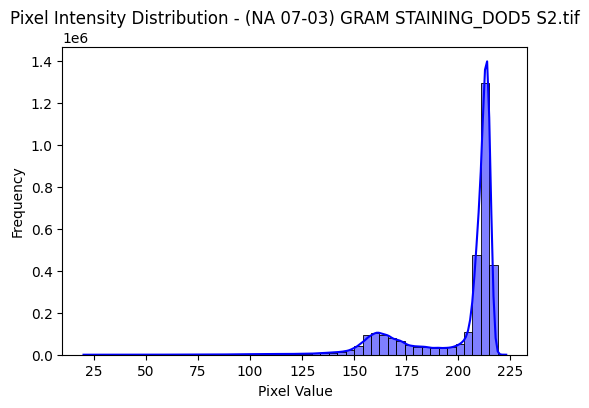

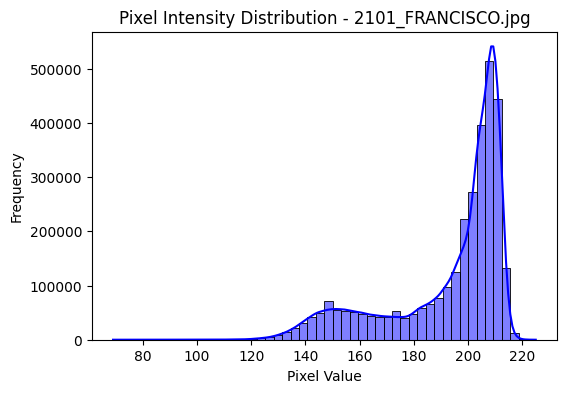

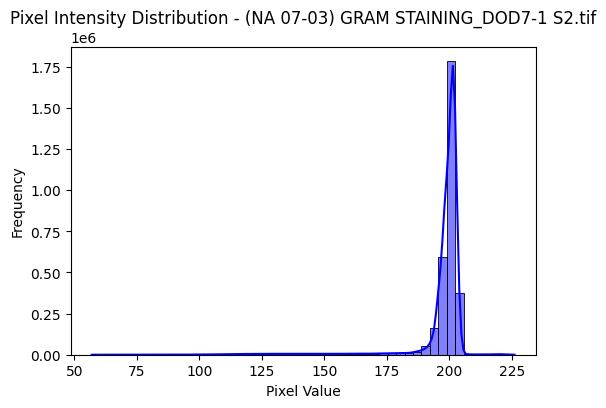

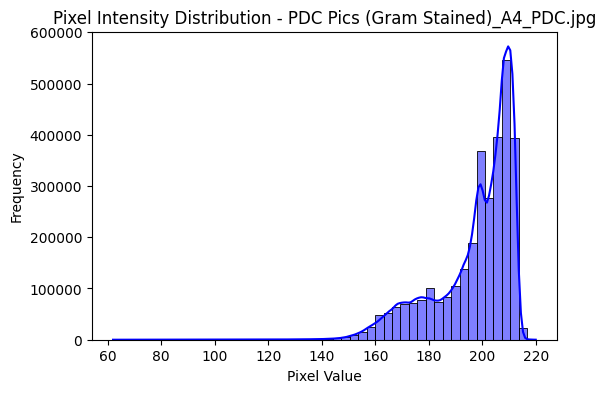

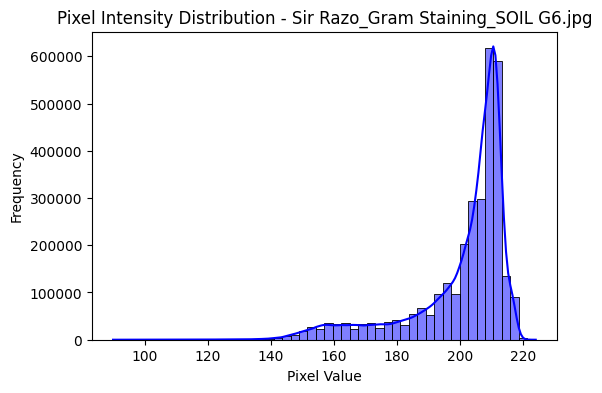

In [5]:
eda.plot_pixel_intensity_distribution(clinical_dir, num_samples=5)

(50, 4096)


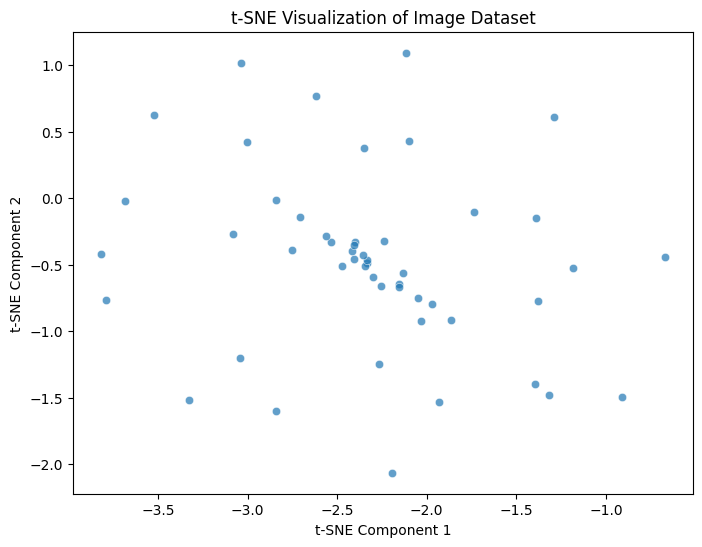

In [6]:
eda.plot_tsne_clusters(clinical_dir, num_samples=50)

In [7]:
import preprocessing as pp

clinical_dir_preprocessed = "data/preprocessed/clinical-pb/"
if not os.path.exists(clinical_dir_preprocessed):
    os.makedirs(clinical_dir_preprocessed)

In [8]:
pp.preprocess_images(clinical_dir, clinical_dir_preprocessed, 
                  target_size=(128, 128), convert_grayscale=False, apply_augmentation=False, try_display=False)

Processing clinical-pb: 100%|██████████| 55/55 [00:05<00:00,  9.47it/s]

✅ Preprocessing complete! Images saved in: data/preprocessed/clinical-pb/


In [9]:
pp.save_as_numpy(clinical_dir_preprocessed, convert_grayscale=False, npy_filename="clinical_images.npy")

🔍 Found 55 images.


Loading images: 100%|██████████| 55/55 [00:00<00:00, 1032.32it/s]


✅ Saved dataset: clinical_images.npy (Shape: (55, 128, 128, 3))


In [10]:
from train_autoencoder import train_autoencoder
from cluster_latents import extract_latents, cluster_and_visualize
from save_latents import extract_and_save_latents

Epoch 1/30, Loss: 0.1261
Epoch 2/30, Loss: 0.1259
Epoch 3/30, Loss: 0.1253
Epoch 4/30, Loss: 0.1229
Epoch 5/30, Loss: 0.1156
Epoch 6/30, Loss: 0.1063
Epoch 7/30, Loss: 0.1115
Epoch 8/30, Loss: 0.0996
Epoch 9/30, Loss: 0.0991
Epoch 10/30, Loss: 0.0985
Epoch 11/30, Loss: 0.0935
Epoch 12/30, Loss: 0.0899
Epoch 13/30, Loss: 0.0891
Epoch 14/30, Loss: 0.0840
Epoch 15/30, Loss: 0.0811
Epoch 16/30, Loss: 0.0791
Epoch 17/30, Loss: 0.0756
Epoch 18/30, Loss: 0.0760
Epoch 19/30, Loss: 0.0743
Epoch 20/30, Loss: 0.0743
Epoch 21/30, Loss: 0.0726
Epoch 22/30, Loss: 0.0726
Epoch 23/30, Loss: 0.0712
Epoch 24/30, Loss: 0.0719
Epoch 25/30, Loss: 0.0701
Epoch 26/30, Loss: 0.0696
Epoch 27/30, Loss: 0.0688
Epoch 28/30, Loss: 0.0672
Epoch 29/30, Loss: 0.0666
Epoch 30/30, Loss: 0.0642
✅ Autoencoder saved to autoencoder_clinical.pth


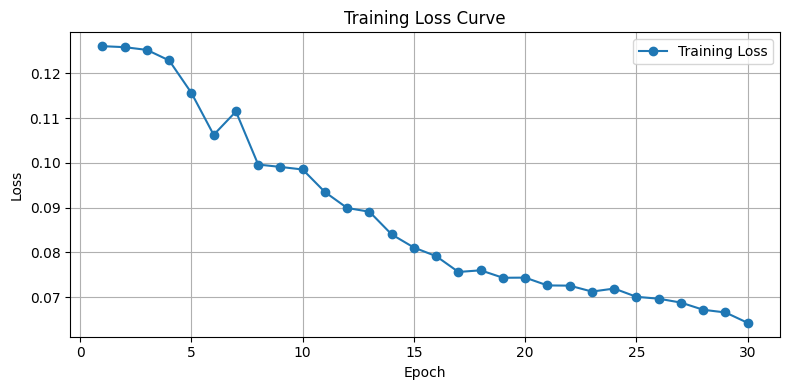

🥇 Best Epoch: 30, Best Loss: 0.0642


In [11]:
train_autoencoder(
    dataset_path="clinical_images.npy",
    save_path="autoencoder_clinical.pth",
    epochs=30,
    batch_size=64,
    lr=1e-3,
    early_stopping_patience=3,
)

In [12]:
extract_and_save_latents("clinical_images.npy", "autoencoder_clinical.pth", output_path="clinical_latents.npy")

✅ Latents saved to clinical_latents.npy (shape: (55, 16384))


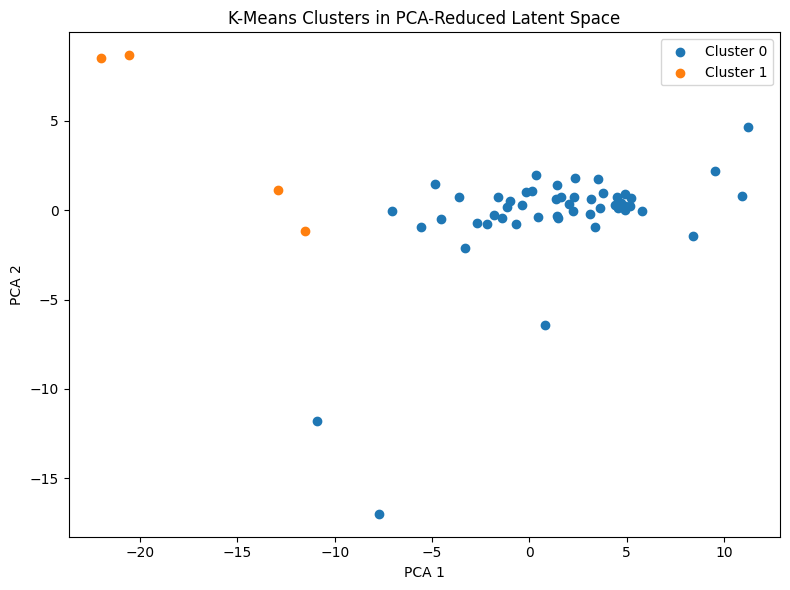

Cluster labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
✅ Cluster labels saved as cluster_labels.npy


In [37]:
latents = extract_latents("autoencoder_clinical.pth", "clinical_images.npy")
labels = cluster_and_visualize(latents, n_clusters=2)
print("Cluster labels:", labels)

import numpy as np

np.save("clinical_cluster_labels.npy", labels)
print("✅ Cluster labels saved as cluster_labels.npy")

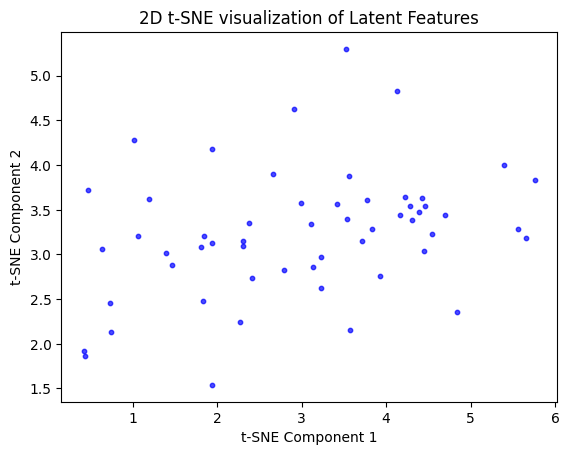

In [13]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Load the latent features from the .npy file
clinical_latents = np.load('clinical_latents.npy')  # Ensure this file exists and contains the latents

# Reduce dimensions using PCA (optional step)
pca = PCA(n_components=50)  # Reduce to 50 components
pca_latents = pca.fit_transform(clinical_latents)

# Now use t-SNE for further dimensionality reduction and visualization in 2D
tsne = TSNE(n_components=2, random_state=42)
latent_tsne = tsne.fit_transform(pca_latents)

# Visualizing the 2D latent space
plt.scatter(latent_tsne[:, 0], latent_tsne[:, 1], c='blue', alpha=0.7, s=10)
plt.title('2D t-SNE visualization of Latent Features')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


✅ Loaded dataset with shape: (55, 128, 128, 3)


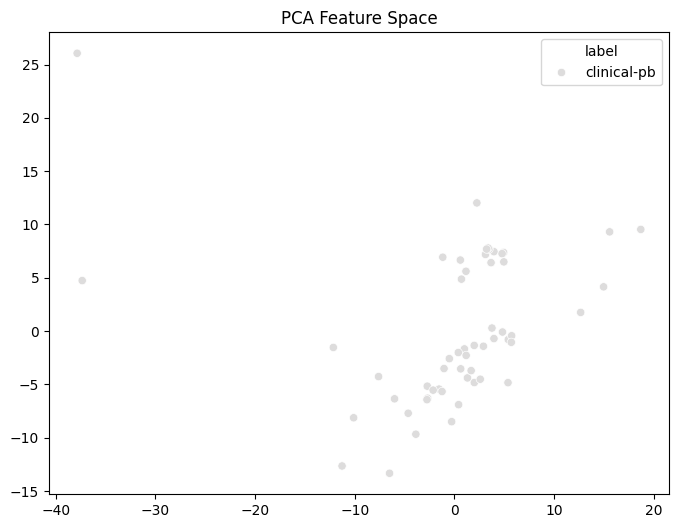

In [14]:
import pda as pda
from pathlib import Path

# Load dataset and metadata
dataset = pda.load_dataset("clinical_images.npy")
metadata_df = pda.load_metadata("data/preprocessed/clinical-pb/preprocessing_log.json")

metadata_df["label"] = metadata_df["original_path"].apply(lambda p: Path(p).parent.name)

pda.visualize_pca(dataset, metadata_df["label"])


In [15]:
import torch
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from semi_supervised_mlp import LatentMLPClassifier

In [16]:
clinical_data = np.load('clinical_latents.npy')
clinical_data.shape[1]  # This should match the input size used during training

16384

In [21]:
from torch.serialization import safe_globals
with safe_globals([LatentMLPClassifier]):
    model = torch.load("mlp_classifier.pth", weights_only=False)
model.eval()  # Set to evaluation mode

LatentMLPClassifier(
  (classifier): Sequential(
    (0): Linear(in_features=16384, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=128, out_features=1, bias=True)
    (4): Sigmoid()
  )
)

In [22]:
clinical_data_tensor = torch.tensor(clinical_data, dtype=torch.float32)

In [56]:
with torch.no_grad():
    predictions = model(clinical_data_tensor)    
    predicted_labels = (predictions > 0.5).float().numpy()
print(predicted_labels)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]


In [58]:
cluster_labels = np.load("clinical_cluster_labels.npy")

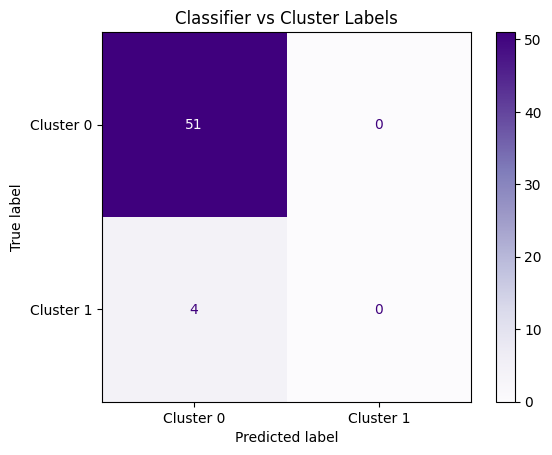

In [64]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, normalized_mutual_info_score
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(cluster_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Cluster 0", "Cluster 1"])
disp.plot(cmap="Purples")
plt.title("Classifier vs Cluster Labels")
plt.show()


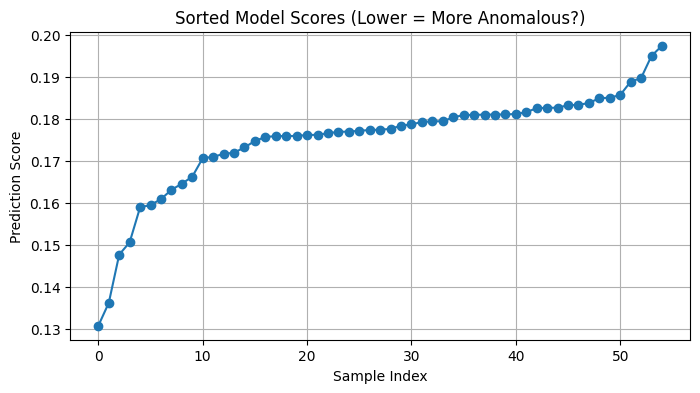

In [65]:
import matplotlib.pyplot as plt

# Plot sorted scores
sorted_scores = torch.sort(predictions.squeeze())[0].numpy()

plt.figure(figsize=(8, 4))
plt.plot(sorted_scores, marker='o')
plt.title("Sorted Model Scores (Lower = More Anomalous?)")
plt.xlabel("Sample Index")
plt.ylabel("Prediction Score")
plt.grid(True)
plt.show()


In [66]:
percentile = 5  # e.g. 5% most "anomalous"
threshold = np.percentile(predictions.numpy(), percentile)

anomaly_flags = (predictions.numpy() < threshold).astype(int)  # 1 = anomaly
print(f"Anomaly threshold: {threshold:.4f}")
print(f"Detected {anomaly_flags.sum()} anomalies out of {len(anomaly_flags)} samples")


Anomaly threshold: 0.1498
Detected 3 anomalies out of 55 samples


In [67]:
from collections import Counter

print("Cluster label breakdown of anomalies:")
print(Counter(cluster_labels[anomaly_flags == 1]))


Cluster label breakdown of anomalies:
Counter({np.int32(0): 2, np.int32(1): 1})
